In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

[]


In [4]:
import glob
from PIL import Image
import glob
all_images=[]
img_size=(32,20)
labels=[]
for f in glob.glob('d:\\data\\power\\**\\*.jpg', recursive=True):
    arr=f.split('\\')
    img = Image.open(f)
    img_resize = img.resize((img_size[0], img_size[1]))
    all_images.append(img_resize)
    label=float(arr[3])
    labels.append(label)

In [5]:
labels[:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [6]:
len(labels)

12319

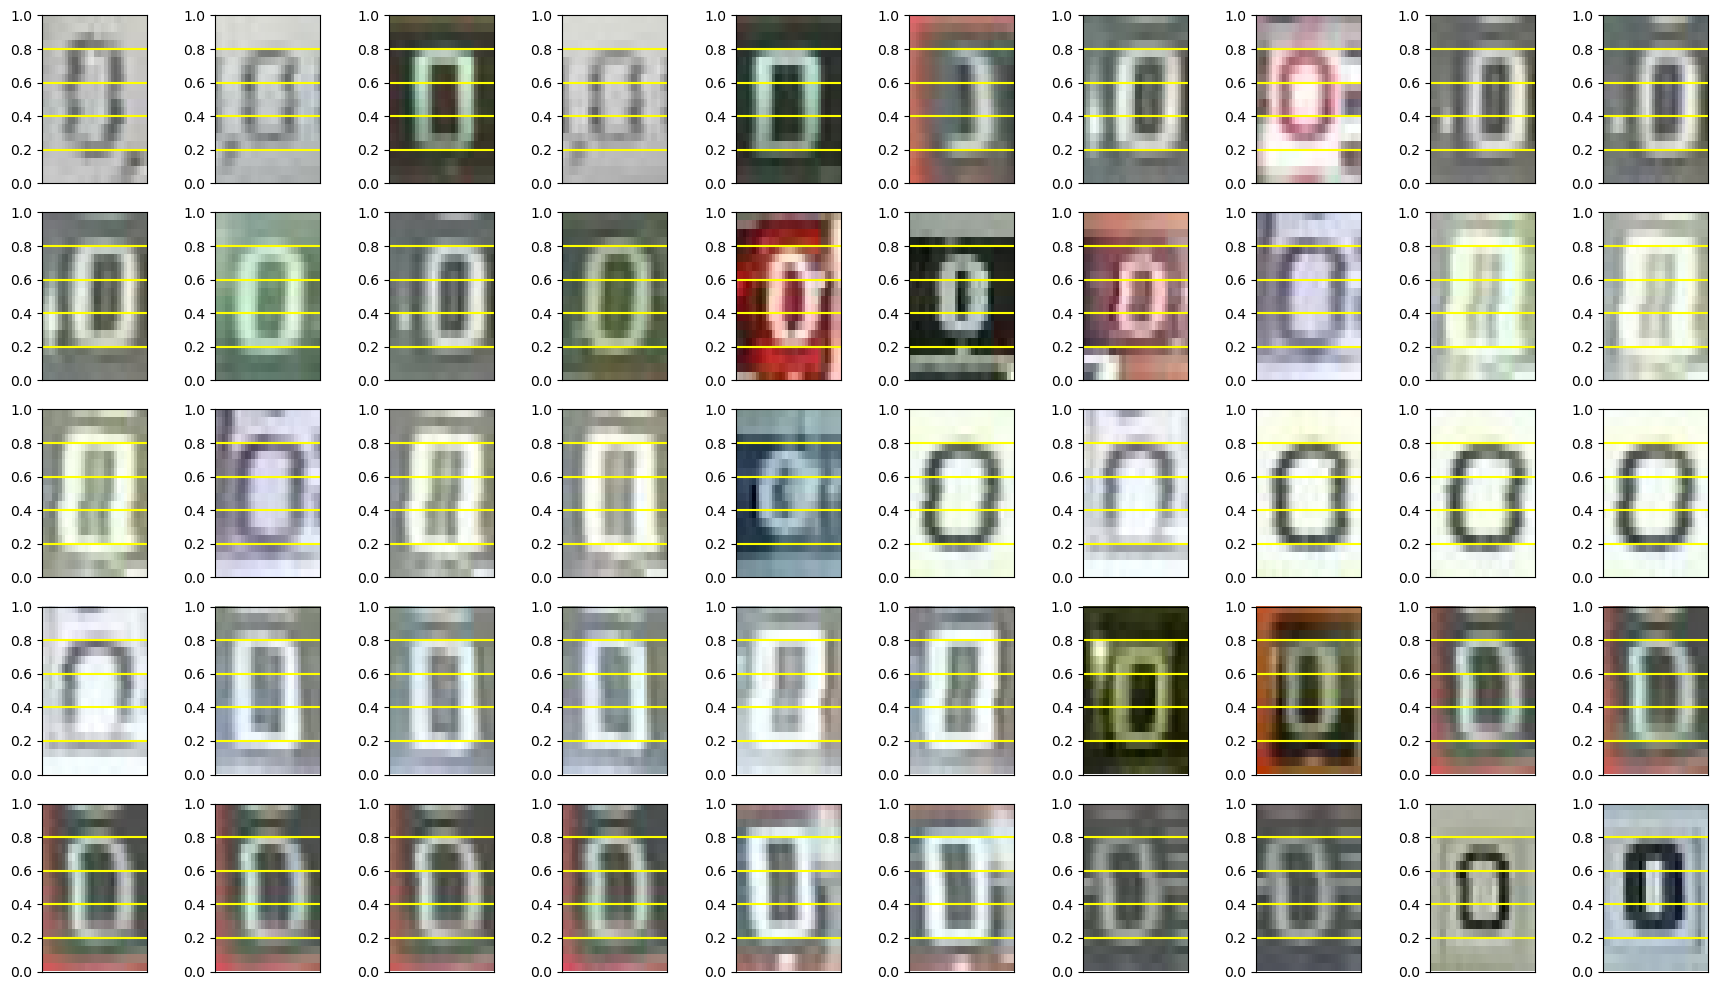

In [7]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(18, 10))
columns = 10
rows = 5
for i in range(1, columns*rows +1):
    if i>len(all_images):
        break
    fig.add_subplot(rows, columns, i)
    plt.xticks([0.2, 0.4, 0.6, 0.8])
    plt.imshow((all_images[i-1]), aspect='1.6', extent=[0, 1, 0, 1])
    for y in np.arange(0.2, 0.8, 0.2):
        plt.axhline(y=y,color='yellow')
    ax=plt.gca()
    ax.get_xaxis().set_visible(False)
    plt.tight_layout()
    
plt.show()

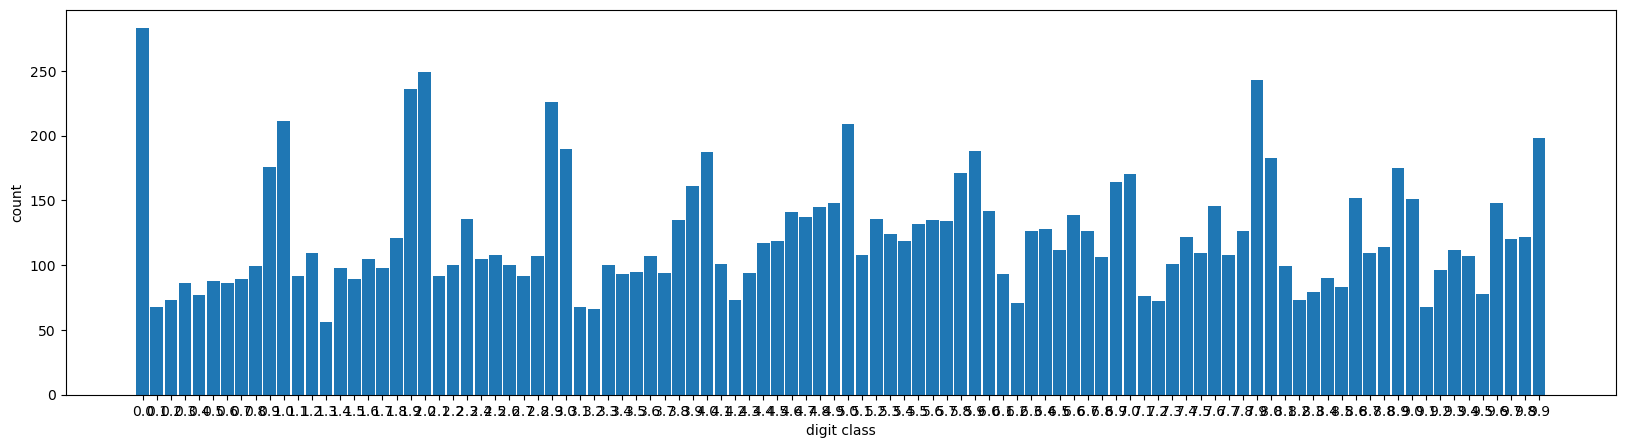

In [8]:
# 데이터 개수
_, inverse = np.unique(labels, return_inverse=True)
data_bincount = np.bincount(inverse)
plt.figure(figsize=(20,5))
plt.bar(np.arange (0, 10, 0.1), data_bincount, width=0.09, align='center')
plt.ylabel('count')
plt.xlabel('digit class')
plt.xticks(np.arange(0, 10, 0.1))
plt.show()

In [9]:
#오래걸림
X=np.empty((1,img_size[0],img_size[1],3))
for img in all_images:
    X=np.vstack((X,np.array(img).reshape(1,img_size[0],img_size[1],3)))
X.shape

(12320, 32, 20, 3)

In [10]:
X = np.delete(X, (0), axis=0)

In [11]:
X.shape

(12319, 32, 20, 3)

In [12]:
x_data=X/255.
x_data

array([[[[0.71764706, 0.72156863, 0.69803922],
         [0.71764706, 0.72156863, 0.69803922],
         [0.72156863, 0.7254902 , 0.70196078],
         ...,
         [0.78823529, 0.79215686, 0.76862745],
         [0.81960784, 0.82352941, 0.8       ],
         [0.80392157, 0.80784314, 0.78431373]],

        [[0.8       , 0.80392157, 0.78039216],
         [0.81176471, 0.81568627, 0.79215686],
         [0.77647059, 0.78039216, 0.75686275],
         ...,
         [0.74117647, 0.74509804, 0.72156863],
         [0.74509804, 0.74901961, 0.7254902 ],
         [0.75686275, 0.76078431, 0.7372549 ]],

        [[0.77647059, 0.78039216, 0.75686275],
         [0.79215686, 0.79607843, 0.77254902],
         [0.80392157, 0.80784314, 0.78431373],
         ...,
         [0.78823529, 0.78823529, 0.76078431],
         [0.8       , 0.8       , 0.76862745],
         [0.80392157, 0.80392157, 0.77254902]],

        ...,

        [[0.78431373, 0.78431373, 0.78431373],
         [0.76470588, 0.76470588, 0.76470588]

In [13]:
y_data=np.array(labels)
y_data

array([0. , 0. , 0. , ..., 9.9, 9.9, 9.9])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9855, 32, 20, 3), (2464, 32, 20, 3), (9855,), (2464,))

In [15]:
from keras.models import Sequential
from keras.layers import *
model = Sequential()
model.add(BatchNormalization(input_shape=(32,20,3))) # 미니배치의 출력값을 정규화
model.add(Conv2D(32, (3, 3), padding='same', activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(32, (3, 3), padding='same', activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(32, (3, 3), padding='same', activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(1, activation = None))
model.compile(loss='mae', optimizer="rmsprop", metrics = ["mae"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 32, 20, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 32, 20, 32)        896       
                                                                 
 batch_normalization_1 (Batc  (None, 32, 20, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 10, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 10, 32)        0         
                                                        

In [16]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("d:/data/model/power_best.h5",
                             monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min')
hist = model.fit(X_train, y_train, batch_size=32,
                 validation_split=0.2, epochs=40, 
                 callbacks=[checkpoint])

Epoch 1/40
246/247 [============================>.] - ETA: 0s - loss: 2.6568 - mae: 2.6568
Epoch 1: val_loss improved from inf to 2.98519, saving model to d:/data/model\power_best.h5
247/247 [==============================] - 7s 25ms/step - loss: 2.6578 - mae: 2.6578 - val_loss: 2.9852 - val_mae: 2.9852
Epoch 2/40
245/247 [============================>.] - ETA: 0s - loss: 2.2517 - mae: 2.2517
Epoch 2: val_loss improved from 2.98519 to 2.27097, saving model to d:/data/model\power_best.h5
247/247 [==============================] - 6s 24ms/step - loss: 2.2519 - mae: 2.2519 - val_loss: 2.2710 - val_mae: 2.2710
Epoch 3/40
246/247 [============================>.] - ETA: 0s - loss: 2.1075 - mae: 2.1075
Epoch 3: val_loss improved from 2.27097 to 1.88906, saving model to d:/data/model\power_best.h5
247/247 [==============================] - 8s 31ms/step - loss: 2.1078 - mae: 2.1078 - val_loss: 1.8891 - val_mae: 1.8891
Epoch 4/40
246/247 [============================>.] - ETA: 0s - loss: 1.9688 

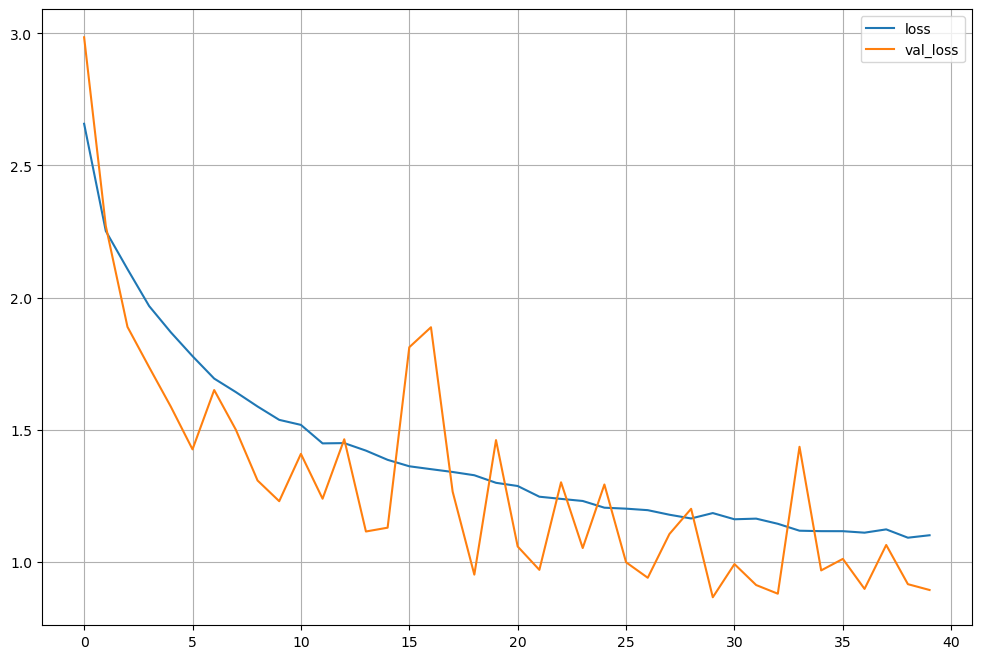

In [17]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.grid()
plt.show()

In [18]:
from tensorflow.keras.models import load_model
model = load_model('d:/data/model/power_best.h5')
scores = model.evaluate(X_train, y_train, verbose=1)
print(scores)

308/308 [==============================] - 2s 5ms/step - loss: 0.7653 - mae: 0.7653
[0.7652972936630249, 0.7652972936630249]


In [19]:
model = load_model('d:/data/model/power_best.h5')
scores = model.evaluate(X_test, y_test, verbose=1)
print(scores)

77/77 [==============================] - 0s 5ms/step - loss: 0.8698 - mae: 0.8698
[0.8697870373725891, 0.8697870373725891]


In [20]:
pred=model.predict(X_test)
pred[:5]

77/77 [==============================] - 1s 5ms/step


array([[5.815341 ],
       [6.100965 ],
       [3.9969358],
       [5.9904995],
       [0.8782092]], dtype=float32)

In [21]:
y_test[:5]

array([5.8, 8.1, 4. , 8. , 0.2])